In [1]:
%matplotlib inline

import os
import sys
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import glob
import uproot

# Kernel = Minuitenv, DataSc



In [2]:
## FOR NOW
# files that end with _t*.root contain the TTree but not the histos
# file that end with r*.root contain the histos but not the TTree

In [16]:
file = uproot.open(f"build/histos.root")
print(file.keys())

['WavelengthOptical;1']


In [19]:
file['WavelengthOptical'].title.split(';')

['Optical Photons', ' Wavelength (nm)', ' Counts']

In [25]:
# file['WavelengthOptical'].to_hist().GetXaxis().GetTitle()

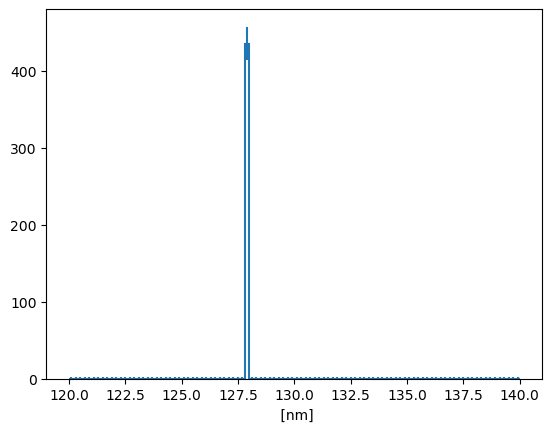

In [17]:
file['WavelengthOptical'].to_hist().plot(); 

## Read histos

In [3]:
# file['CreationTime'].to_hist().plot(); 


['truth;1', 'Wavelength;1', 'Ekin;1', 'Energy;1', 'Momentum;1', 'CreationTime;1', 'WavelengthGammas;1', 'EkinGammas;1', 'EnergyGammas;1', 'MomentumGammas;1', 'CreationTimeGammas;1']
Wavelength;1  466012 entries
Ekin;1  466012 entries
Energy;1  466012 entries
Momentum;1  466012 entries
CreationTime;1  465815 entries
WavelengthGammas;1  172073 entries
EkinGammas;1  202970 entries
EnergyGammas;1  202970 entries
MomentumGammas;1  202970 entries
CreationTimeGammas;1  202942 entries


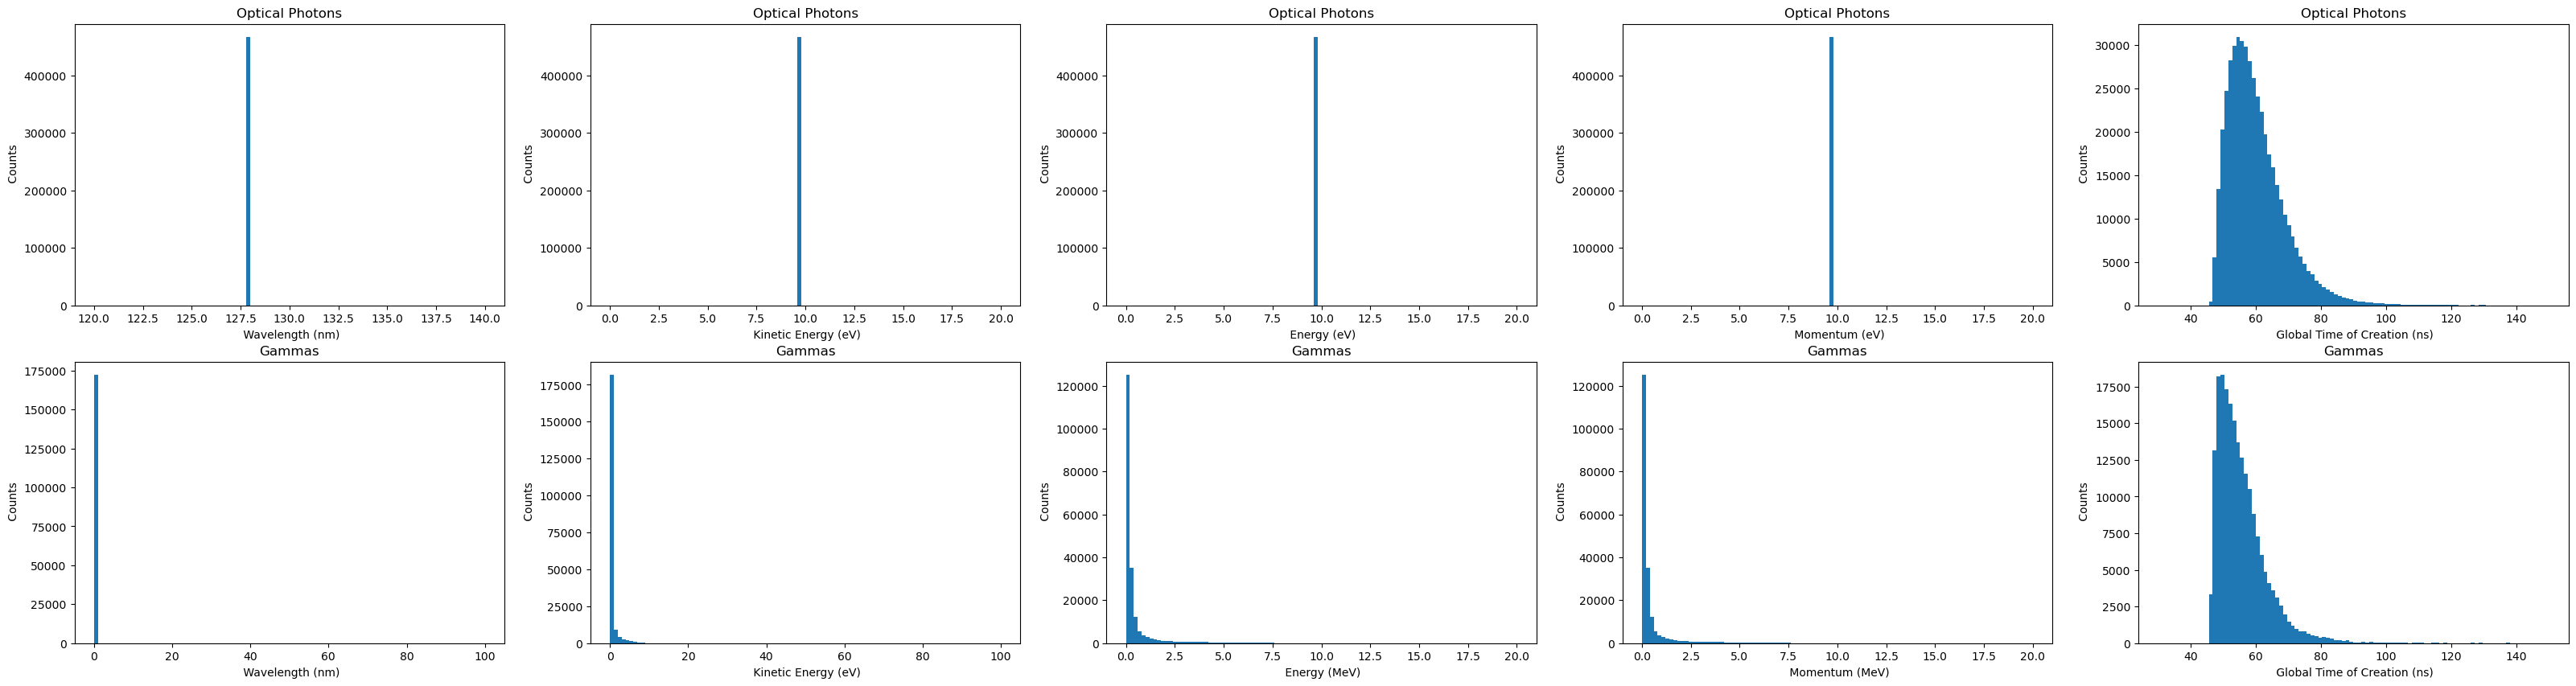

In [7]:
file = uproot.open(f"build/output_r0.root")
print(file.keys())


# file['CreationTime'].to_hist().plot();  # quick plot

nrows, ncols = 2, 5
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*8, nrows*5))

i = 0
for var in file.keys()[1:]:
    print(f'{var}  {file[var].values().sum():.0f} entries')

    ax = axs.flatten()[i]

    # Convert a branch to a histogram using the to_hist() method
    h = file[var].to_hist()  # Adjust this to your branch name

    # Plotting using matplotlib
    ax.bar(h.axes[0].centers, h.view()["value"], width=h.axes[0].widths)

    labels = file[var].title.split(';')
    ax.set_xlabel(labels[1])  
    ax.set_ylabel(labels[2])  
    ax.set_title(labels[0])  
    i+=1

    